<a href="https://colab.research.google.com/github/danielbehargithub/LinkedIn_Salary/blob/main/Salary/Salary_Dataset_Analyze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycountry_convert

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import pycountry_convert as pc
import requests
import io

In [5]:
# Define the base URL and the download path
base_url = "https://aijobs.net"
download_path = "/salaries/download/salaries.csv"

# Construct the full URL for the CSV file
download_url = base_url + download_path

# Send a GET request to download the file
response = requests.get(download_url, allow_redirects=True)

# Check if the request was successful
if response.status_code == 200:
    print("File downloaded successfully. Loading into DataFrame...")

    # Read the CSV file directly into a pandas DataFrame from the response content
    data = pd.read_csv(io.StringIO(response.text))

    # Print general dataset information
    print("\n🔹 Dataset Overview:")
    print(f"Shape: {data.shape}")  # Number of rows and columns
    print(f"Columns: {data.columns.tolist()}")  # Column names
    print("\n🔹 Data Types and Missing Values:")
    print(data.info())  # Data types and non-null counts
    print("\n🔹 Statistical Summary:")
    print(data.describe())  # Summary statistics for numerical columns

else:
    print(f"Failed to download file. Status code: {response.status_code}")


File downloaded successfully. Loading into DataFrame...

🔹 Dataset Overview:
Shape: (81388, 11)
Columns: ['work_year', 'experience_level', 'employment_type', 'job_title', 'salary', 'salary_currency', 'salary_in_usd', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']

🔹 Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81388 entries, 0 to 81387
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           81388 non-null  int64 
 1   experience_level    81388 non-null  object
 2   employment_type     81388 non-null  object
 3   job_title           81388 non-null  object
 4   salary              81388 non-null  int64 
 5   salary_currency     81388 non-null  object
 6   salary_in_usd       81388 non-null  int64 
 7   employee_residence  81388 non-null  object
 8   remote_ratio        81388 non-null  int64 
 9   company_location    81388 non-nul

In [6]:
data = data.drop(columns=["salary", "salary_currency"])

# Identify categorical columns dynamically (excluding the target column)
categorical_columns = [
    'experience_level', 'employment_type', 'employee_residence',
    'company_location', 'company_size', 'job_title', 'remote_ratio'
]

# Convert categorical columns to categorical dtype
for col in categorical_columns:
    data[col] = data[col].astype('category')


# Print the number of unique values for each categorical column
print("\n🔹 Unique value count per categorical column:\n")
for col in categorical_columns:
    unique_count = data[col].nunique()
    print(f"{col}: {unique_count} unique values")



🔹 Unique value count per categorical column:

experience_level: 4 unique values
employment_type: 4 unique values
employee_residence: 95 unique values
company_location: 89 unique values
company_size: 3 unique values
job_title: 300 unique values
remote_ratio: 3 unique values


In [7]:
# Count the number of records for each job title
job_counts = data['job_title'].value_counts()

# Calculate the percentage of records for each job title
job_percentage = (job_counts / len(data)) * 100



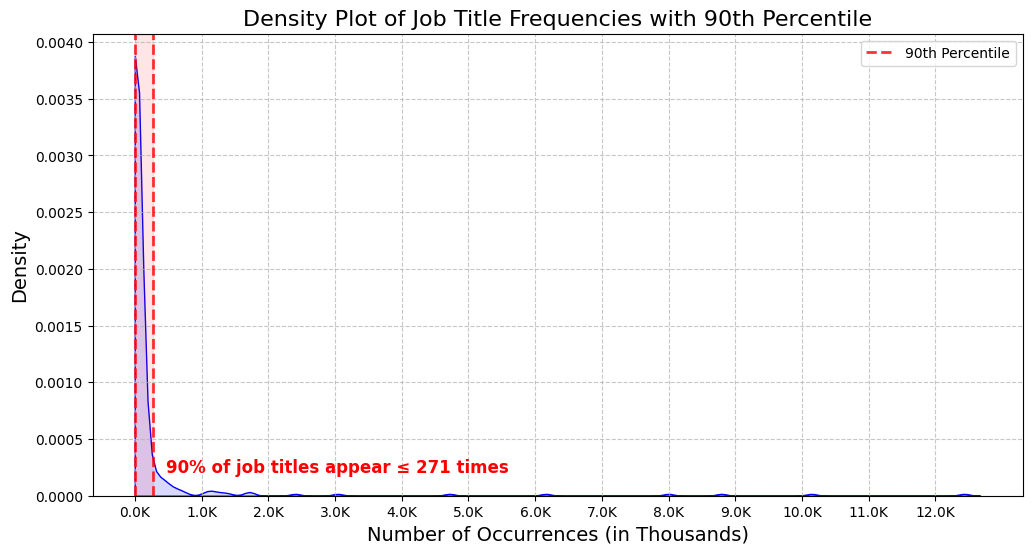

In [8]:
# Compute the 90th percentile of job title frequencies
percentile_90 = np.percentile(job_counts, 90)

# Create the density plot
plt.figure(figsize=(12, 6))
sns.kdeplot(job_counts, fill=True, color="blue", alpha=0.15, bw_adjust=0.2, clip=(0, None))

# Vertical line to mark the cutoff
plt.axvline(10, color="red", linestyle="--", linewidth=2, alpha=0.8)

# Highlight the area under the 90th percentile
plt.axvspan(0, percentile_90, color="red", alpha=0.1)

# Vertical line marking the 95th percentile
plt.axvline(percentile_90, color="red", linestyle="--", linewidth=2, alpha=0.8, label="90th Percentile")


# Add a text annotation to indicate the 95th percentile threshold
plt.text(percentile_90 + 200, plt.ylim()[1] * 0.05,
         f"90% of job titles appear ≤ {int(percentile_90)} times",
         ha="left", fontsize=12, color="red", weight="bold")

# Titles and labels
plt.title("Density Plot of Job Title Frequencies with 90th Percentile", fontsize=16)
plt.xlabel("Number of Occurrences (in Thousands)", fontsize=14)
plt.ylabel("Density", fontsize=14)

# Improve X-axis ticks resolution
plt.xticks(np.arange(0, job_counts.max() + 500, step=1000),
           labels=[f"{x/1000:.1f}K" for x in np.arange(0, job_counts.max() + 500, step=1000)])

plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


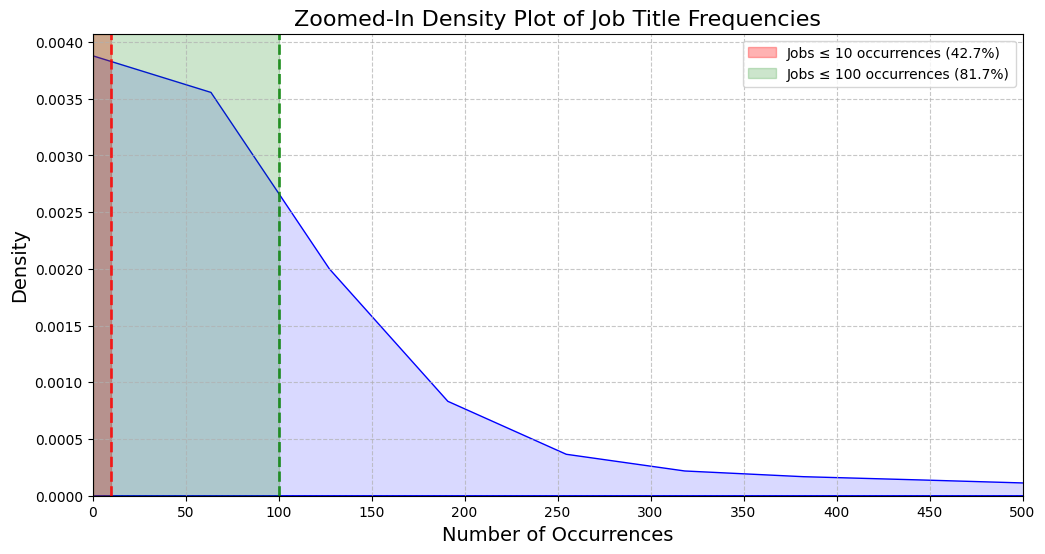

In [9]:
# Compute percentage of jobs appearing ≤ 100 times
rare_jobs_100 = job_counts[job_counts <= 100].count()
rare_jobs_percentage_100 = (rare_jobs_100 / len(job_counts)) * 100

# Compute percentage of jobs appearing ≤ 10 times
rare_jobs_10 = job_counts[job_counts <= 10].count()
rare_jobs_percentage_10 = (rare_jobs_10 / len(job_counts)) * 100

# Create the density plot
plt.figure(figsize=(12, 6))
sns.kdeplot(job_counts, fill=True, color="blue", alpha=0.15, bw_adjust=0.2, clip=(0, None))

# Highlight area for jobs with ≤ 10 occurrences (in red)
plt.axvspan(0, 10, color="red", alpha=0.3, label=f"Jobs ≤ 10 occurrences ({rare_jobs_percentage_10:.1f}%)")

# Highlight area for jobs with ≤ 100 occurrences (in green)
plt.axvspan(0, 100, color="green", alpha=0.2, label=f"Jobs ≤ 100 occurrences ({rare_jobs_percentage_100:.1f}%)")

# Vertical lines marking the cutoffs
plt.axvline(10, color="red", linestyle="--", linewidth=2, alpha=0.8)
plt.axvline(100, color="green", linestyle="--", linewidth=2, alpha=0.8)

# Titles and labels
plt.title("Zoomed-In Density Plot of Job Title Frequencies", fontsize=16)
plt.xlabel("Number of Occurrences", fontsize=14)
plt.ylabel("Density", fontsize=14)

# Limit the x-axis range to zoom in on job titles ≤ 500 occurrences
plt.xlim(0, 500)

# Improve X-axis ticks resolution
plt.xticks(np.arange(0, 550, step=50), labels=[f"{x}" for x in np.arange(0, 550, step=50)])

plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


Analysis of Job Title Frequency Distribution
The two density plots provide insights into the distribution of job title occurrences in the dataset.

Overall Distribution:

The first plot presents a full view of job title frequencies.
It highlights that 90% of job titles appear fewer than 271 times, emphasizing the dominance of less frequent job titles.

Zoomed-In View (≤ 500 occurrences):

The second plot zooms in on job titles with 500 or fewer occurrences to provide a clearer perspective.
The red region represents job titles that appear ≤ 10 times, showcasing their significant proportion- 44% of all the data
The green region highlights job titles with ≤ 100 occurrences, reinforcing the long-tail nature of the dataset.

This visualization confirms that the majority of job titles have a very low representation in the dataset.

Key Insight: The dataset is highly skewed, with a small number of job titles appearing frequently, while most job titles have very few occurrences. This characteristic should be considered in modeling and feature engineering.



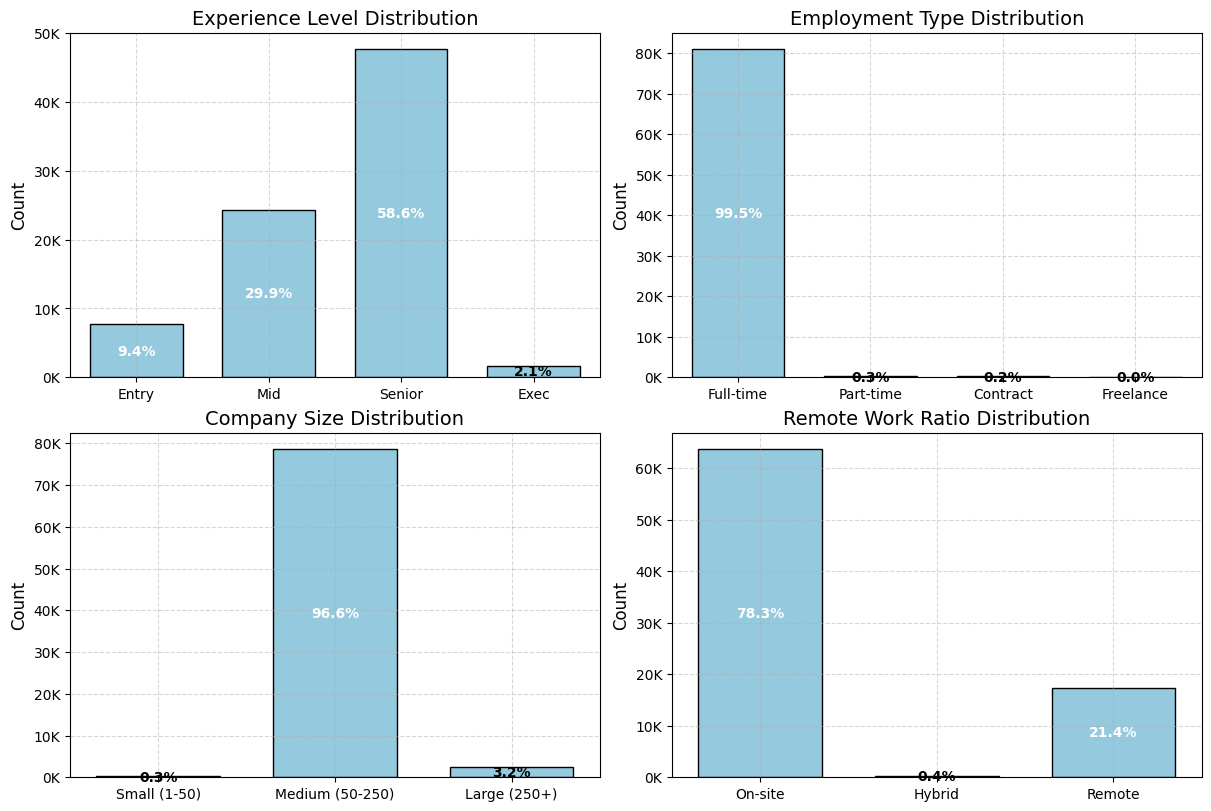

In [10]:
# Define category explanations
category_explanations = {
    "experience_level": {
        "labels": {"EN": "Entry", "MI": "Mid", "SE": "Senior", "EX": "Exec"},
        "title": "Experience Level Distribution"
    },
    "employment_type": {
        "labels": {"FT": "Full-time", "PT": "Part-time", "CT": "Contract", "FL": "Freelance"},
        "title": "Employment Type Distribution"
    },
    "company_size": {
        "labels": {"S": "Small (1-50)", "M": "Medium (50-250)", "L": "Large (250+)"},
        "title": "Company Size Distribution"
    },
    "remote_ratio": {
        "labels": {0: "On-site", 50: "Hybrid", 100: "Remote"},
        "title": "Remote Work Ratio Distribution"
    }
}

# Create subplots in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(12, 8), constrained_layout=True)
axes = axes.flatten()

# Plot each categorical column
for i, (col, info) in enumerate(category_explanations.items()):
    counts = data[col].value_counts()

    # Ensure correct data type for remote_ratio
    if col == "remote_ratio":
        mapping = {"On-site": 0, "Hybrid": 50, "Remote": 100}
        counts.index = counts.index.map(lambda x: mapping.get(x, x))

    # Reindex to ensure correct order (fill missing values with 0)
    counts = counts.reindex(info["labels"].keys(), fill_value=0)

    # Create bar plot with reduced bar width
    bars = sns.barplot(x=[info["labels"][k] for k in counts.index], y=counts.values, ax=axes[i],
                       color="skyblue", edgecolor="black", width=0.7)

    # Titles and labels
    axes[i].set_title(info["title"], fontsize=14)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count", fontsize=12)

    # Format Y-axis in thousands (K)
    axes[i].yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{int(x/1000)}K"))

    # Add percentage labels inside bars
    for p, label in zip(axes[i].patches, counts.values):
        height = p.get_height()
        text_color = "white" if height > max(counts.values) * 0.15 else "black"  # White for tall bars

        axes[i].text(p.get_x() + p.get_width() / 2., height / 2,  # Placing in center
                     f'{label / data.shape[0] * 100:.1f}%',
                     ha='center', va='center', fontsize=10, color=text_color, weight="bold")

    # Add dashed grid with lower opacity
    axes[i].grid(True, linestyle="--", alpha=0.5)  # Lighter grid

plt.show()


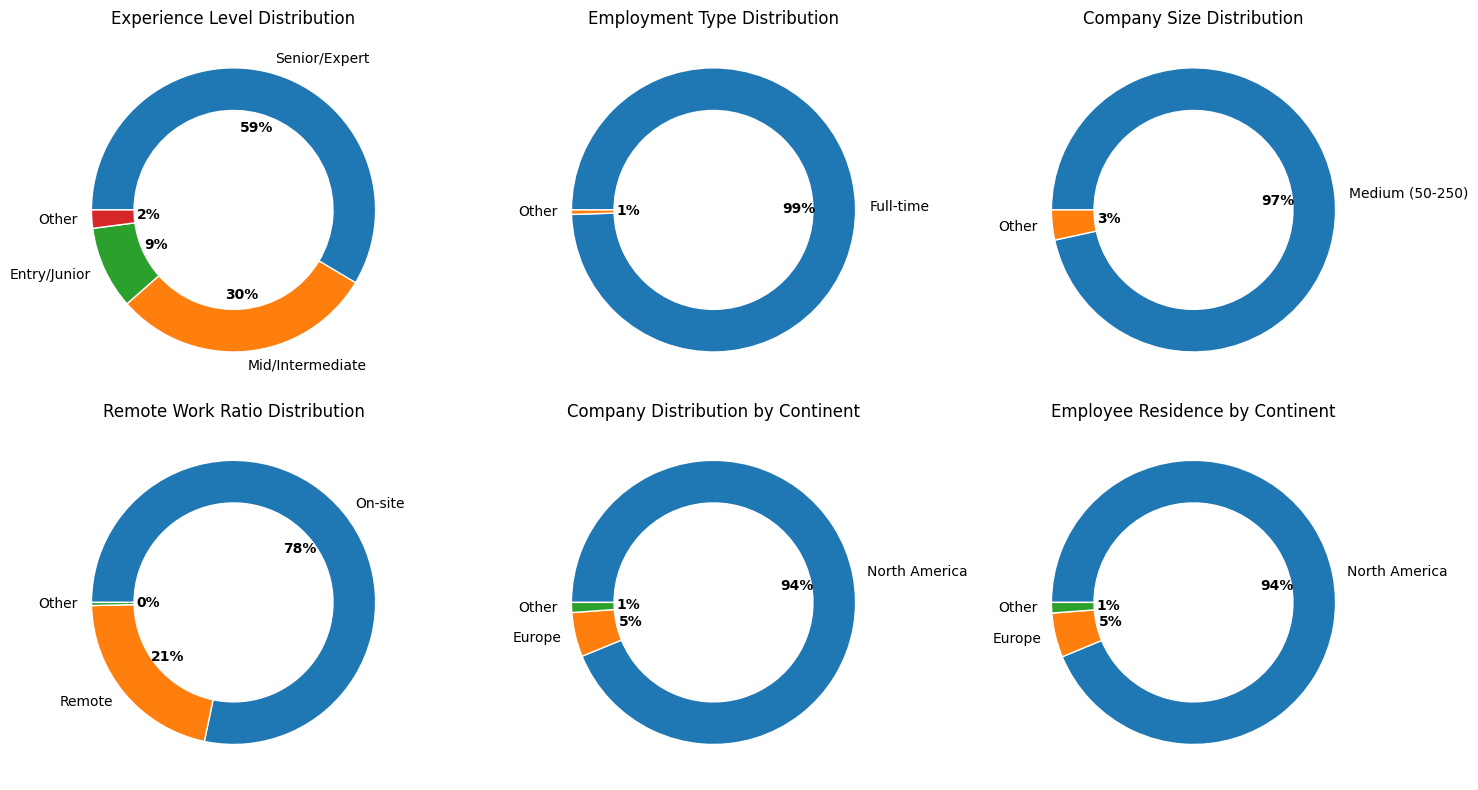

In [11]:
# Function to convert ISO-2 country code to continent
def country_to_continent(country_code):
    try:
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        continent_names = {
            "NA": "North America",
            "SA": "South America",
            "EU": "Europe",
            "AF": "Africa",
            "AS": "Asia",
            "OC": "Oceania"
        }
        return continent_names.get(continent_code, "Other")
    except:
        return "Other"  # Default if the country code is not recognized

# Compute the continent for each relevant column
data["company_continent"] = data["company_location"].apply(country_to_continent)
data["residence_continent"] = data["employee_residence"].apply(country_to_continent)

# Define category explanations for labeling
category_explanations = {
    "experience_level": {
        "labels": {"EN": "Entry/Junior", "MI": "Mid/Intermediate", "SE": "Senior/Expert", "EX": "Executive/Director"},
        "title": "Experience Level Distribution"
    },
    "employment_type": {
        "labels": {"FT": "Full-time", "PT": "Part-time", "CT": "Contract", "FL": "Freelance"},
        "title": "Employment Type Distribution"
    },
    "company_size": {
        "labels": {"S": "Small (1-50)", "M": "Medium (50-250)", "L": "Large (250+)"},
        "title": "Company Size Distribution"
    },
    "remote_ratio": {
        "labels": {0: "On-site", 50: "Hybrid", 100: "Remote"},
        "title": "Remote Work Ratio Distribution"
    },
    "company_continent": {
        "labels": {},  # Will be automatically filled based on continent data
        "title": "Company Distribution by Continent"
    },
    "residence_continent": {
        "labels": {},  # Will be automatically filled based on continent data
        "title": "Employee Residence by Continent"
    }
}

# Create donut charts for categorical distributions
fig, axes = plt.subplots(2, 3, figsize=(15, 8))  # Adjusting to a 2x3 grid
axes = axes.flatten()

for i, (col, info) in enumerate(category_explanations.items()):
    counts = data[col].value_counts().to_dict()
    total = sum(counts.values())

    # Grouping small categories under "Other"
    small_categories = {k: v for k, v in counts.items() if (v / total) * 100 < 5}
    large_categories = {k: v for k, v in counts.items() if (v / total) * 100 >= 5}

    if small_categories:
        small_total = sum(small_categories.values())
        large_categories["Other"] = small_total

    # Creating labels
    labels = [info["labels"].get(k, k) for k in large_categories.keys()]
    values = list(large_categories.values())

    # Generating the donut chart
    wedges, texts, autotexts = axes[i].pie(values, labels=labels, autopct='%1.f%%',
                                           startangle=180, counterclock=False,
                                           wedgeprops=dict(width=0.3, edgecolor="w"))

    for text in autotexts:
        text.set_color("black")
        text.set_fontweight("bold")

    axes[i].set_title(info["title"], fontsize=12)

plt.tight_layout()
plt.show()


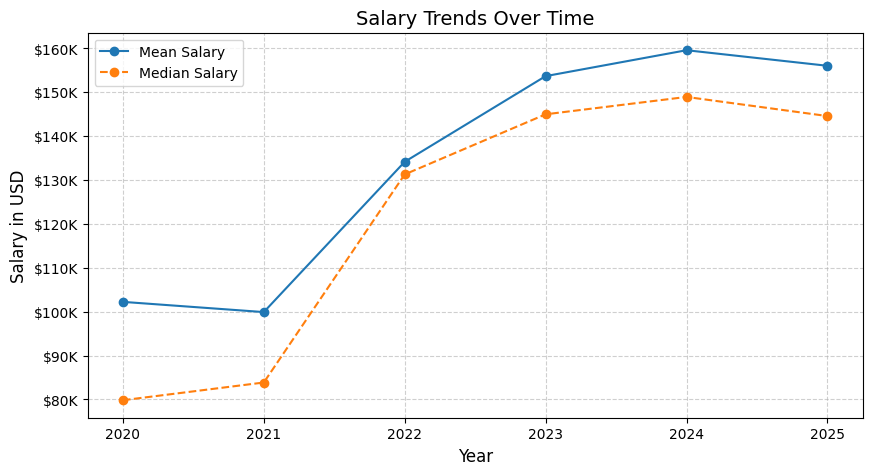

In [12]:
# Calculate mean and median salary per year
salary_trend = data.groupby("work_year")["salary_in_usd"].agg(["mean", "median"])

plt.figure(figsize=(10, 5))
plt.plot(salary_trend.index, salary_trend["mean"], marker="o", label="Mean Salary")
plt.plot(salary_trend.index, salary_trend["median"], marker="o", label="Median Salary", linestyle="--")

# Title and labels
plt.title("Salary Trends Over Time", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Salary in USD", fontsize=12)

# Format Y-axis to display in thousands (K)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"${x/1000:.0f}K"))

# Grid, legend, and layout improvements
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(salary_trend.index)  # Ensure all years are shown
plt.show()


Demographic and Work Distribution:

The majority of employees fall into the Senior/Expert category (~59%), with Mid-Level roles making up 30%.

Full-time employment is overwhelmingly dominant (100%).

Most companies in the dataset are Medium-sized (50-250 employees), with only a small fraction categorized as "Other."

On-site work remains the primary mode (78%), with only 21% working remotely.

North America dominates both in company locations (94%) and employee residences (94%), with minimal representation from Europe and other regions.

Salary Trends Over Time:

Salaries have increased significantly from 2021 onwards, with a sharp rise in 2022.
The gap between mean and median salaries indicates the presence of high outliers, suggesting that some very high salaries pull the average upwards.

A slight dip in 2025 suggests potential stabilization or a shift in market conditions.

Key Considerations:

Since this dataset is heavily concentrated in North America and includes mostly senior-level, on-site, full-time employees in mid-sized companies, it does not necessarily reflect the broader global job market.

The salary trends observed may be industry-specific and influenced by factors not explicitly represented in the dataset.









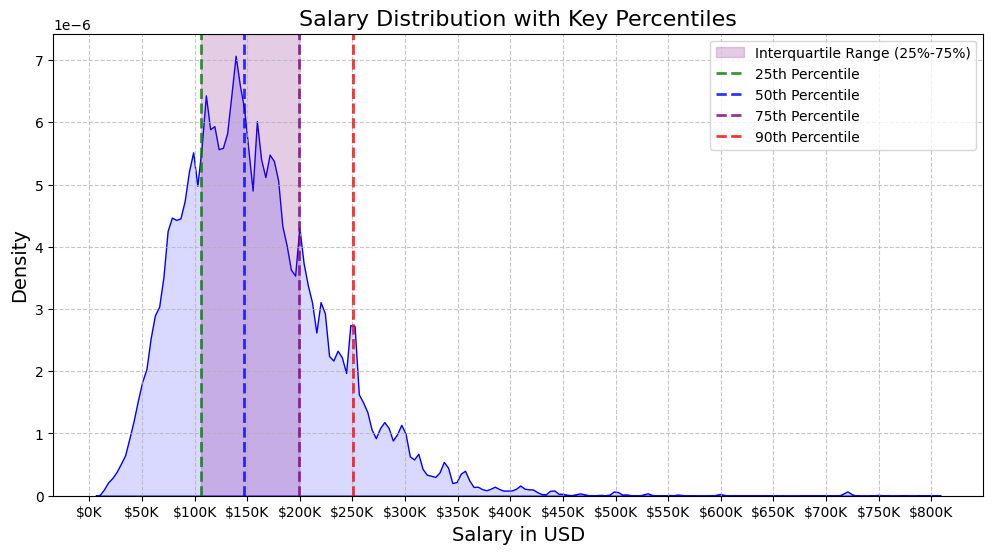

In [13]:
# Compute salary percentiles (25th, 50th, 75th, 90th)
percentiles = np.percentile(data["salary_in_usd"], [25, 50, 75, 90])
p25, p50, p75, p90 = percentiles
colors = ["green", "blue", "purple", "red"]

# Create KDE density plot
plt.figure(figsize=(12, 6))
sns.kdeplot(data["salary_in_usd"], fill=True, color="blue", alpha=0.15, bw_adjust=0.4, clip=(0, None))

# Highlight the interquartile range (IQR: 25%-75%)
plt.axvspan(p25, p75, color="purple", alpha=0.2, label="Interquartile Range (25%-75%)")

# Add vertical lines for key percentiles
for p, label, color in zip(percentiles, ["25th", "50th", "75th", "90th"], colors):
    plt.axvline(p, color=color, linestyle="--", linewidth=2, alpha=0.8, label=f"{label} Percentile")

# Titles and labels
plt.title("Salary Distribution with Key Percentiles", fontsize=16)
plt.xlabel("Salary in USD", fontsize=14)
plt.ylabel("Density", fontsize=14)

# Format X-axis ticks to display salaries in K (thousands)
plt.xticks(np.arange(0, data["salary_in_usd"].max() + 50000, step=50000),
           labels=[f"${int(x/1000)}K" for x in np.arange(0, data["salary_in_usd"].max() + 50000, step=50000)])

# Add legend and grid lines
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)

# Show the plot
plt.show()


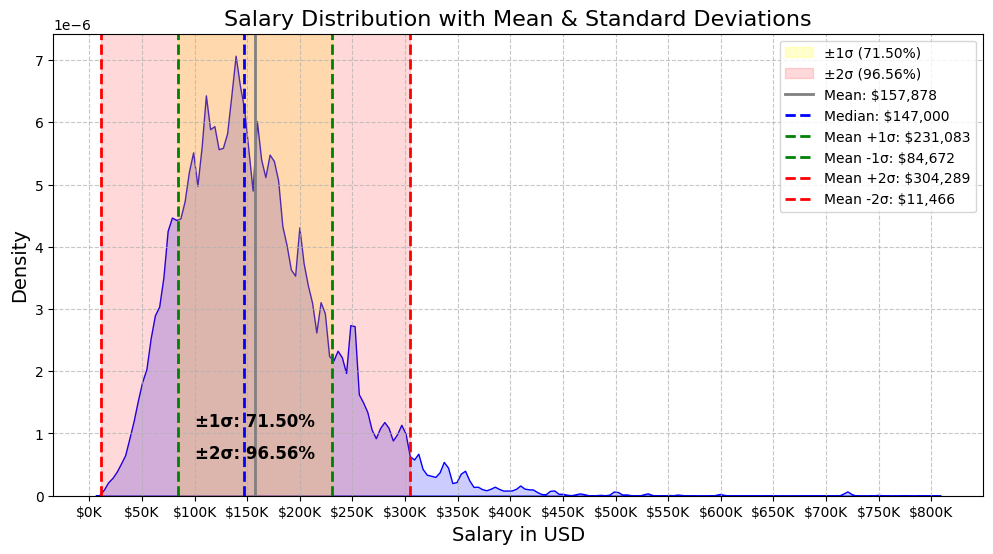

In [14]:
# Compute statistical values
mean_salary = np.mean(data["salary_in_usd"])
std_salary = np.std(data["salary_in_usd"])
median_salary = np.median(data["salary_in_usd"])

# Compute standard deviation ranges
one_std_above = mean_salary + std_salary
one_std_below = mean_salary - std_salary
two_std_above = mean_salary + 2 * std_salary
two_std_below = mean_salary - 2 * std_salary

# Compute the percentage of data within ±1σ and ±2σ
within_1sigma = ((data["salary_in_usd"] >= one_std_below) & (data["salary_in_usd"] <= one_std_above)).mean() * 100
within_2sigma = ((data["salary_in_usd"] >= two_std_below) & (data["salary_in_usd"] <= two_std_above)).mean() * 100

# Create KDE plot
plt.figure(figsize=(12, 6))
ax = sns.kdeplot(data["salary_in_usd"], fill=True, color="blue", alpha=0.2, bw_adjust=0.4, clip=(0, None))

# Adjust Y-axis label
ax.set_ylabel("Density", fontsize=14)

# Highlight standard deviation ranges
plt.axvspan(one_std_below, one_std_above, color="yellow", alpha=0.2, label=f"±1σ ({within_1sigma:.2f}%)")
plt.axvspan(two_std_below, two_std_above, color="red", alpha=0.15, label=f"±2σ ({within_2sigma:.2f}%)")

# Add key statistical lines
plt.axvline(mean_salary, color="gray", linestyle="-", linewidth=2, label=f"Mean: ${int(mean_salary):,}")  # Lighter mean line
plt.axvline(median_salary, color="blue", linestyle="--", linewidth=2, label=f"Median: ${int(median_salary):,}")
plt.axvline(one_std_above, color="green", linestyle="--", linewidth=2, label=f"Mean +1σ: ${int(one_std_above):,}")
plt.axvline(one_std_below, color="green", linestyle="--", linewidth=2, label=f"Mean -1σ: ${int(one_std_below):,}")
plt.axvline(two_std_above, color="red", linestyle="--", linewidth=2, label=f"Mean +2σ: ${int(two_std_above):,}")
plt.axvline(two_std_below, color="red", linestyle="--", linewidth=2, label=f"Mean -2σ: ${int(two_std_below):,}")

# Add text annotations slightly lower
plt.text(mean_salary, plt.ylim()[1] * 0.15, f"±1σ: {within_1sigma:.2f}%", fontsize=12, color="black", weight="bold", ha='center')
plt.text(mean_salary, plt.ylim()[1] * 0.08, f"±2σ: {within_2sigma:.2f}%", fontsize=12, color="black", weight="bold", ha='center')

# Titles and formatting
plt.title("Salary Distribution with Mean & Standard Deviations", fontsize=16)
plt.xlabel("Salary in USD", fontsize=14)

# Format X-axis labels
plt.xticks(np.arange(0, data["salary_in_usd"].max() + 50000, step=50000),
           labels=[f"${int(x/1000)}K" for x in np.arange(0, data["salary_in_usd"].max() + 50000, step=50000)])

plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


Salary Distribution with Mean & Standard Deviations:

The mean salary is slightly above the median salary,  indicating a right-skewed distribution.

The standard deviation is quite large, and 71.5% of the salaries fall within ±1 standard deviation, while 96.55% fall within ±2 standard deviations.

The wide spread of salaries suggests significant variability in wages across different job titles, experience levels, and company attributes.

Implications:

The long tail in the salary distribution may pose challenges for machine learning models, particularly regression models.

Traditional linear regression might struggle due to the presence of outliers and the non-uniform spread.

Tree-based models (e.g., XGBoost, Random Forest) might require deep trees to capture the full complexity of the distribution, leading to potential overfitting or increased computational costs.

Possible solutions:

Log transformation of the salary variable to reduce skewness.

Stratified sampling or SMOTE-like techniques to balance representation across salary ranges.

Using quantile regression instead of standard regression.

In [15]:

X = data.drop(columns=['salary_in_usd'])
y = data['salary_in_usd']



In [16]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import mutual_info_regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Encode categorical variables as numerical values
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_encoded = encoder.fit_transform(X)  # Encode the entire dataset, not just the training set

# Compute Mutual Information on the full dataset
mi_scores = mutual_info_regression(X_encoded, y)

# Create a DataFrame with the results
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values(by='MI Score', ascending=False)

# Print the top 10 most important features
print(mi_df.head(10))


               Feature  MI Score
3            job_title  0.558136
4   employee_residence  0.185078
1     experience_level  0.184893
6     company_location  0.184242
8    company_continent  0.125990
9  residence_continent  0.124858
0            work_year  0.104586
5         remote_ratio  0.086633
7         company_size  0.066013
2      employment_type  0.007333


Key Findings:

job_title (0.560) – The most informative feature for predicting salary. This is expected, as different roles come with vastly different salary ranges.

experience_level (0.187) – Plays a significant role in determining salary, as higher experience generally leads to better compensation.

employee_residence (0.183) – Location of the employee matters, likely due to regional differences in salary expectations, cost of living, or remote work policies.

company_location (0.181) – The country where the company is based affects salaries, possibly due to labor laws, taxes, and economic factors.

work_year (0.101) – Yearly trends have some impact, reflecting salary inflation, industry shifts, or economic cycles.

remote_ratio (0.086) – Remote work flexibility influences salary, though less significantly.

company_size (0.067) – Larger companies may have different pay structures, but its effect is lower than expected.

employment_type (0.007) – Almost negligible impact, meaning full-time, contract, or freelance employment types do not introduce much variance in salaries.


# 🔍 Initial Data Summary

Before moving to modeling, let's briefly summarize the key characteristics of our dataset:

### **1️⃣ Salary Distribution**
- The data exhibits a **long tail**, indicating significant disparities between low and high salaries.
- The mean salary is **higher than the median**, suggesting the presence of **outliers** in the salary distribution.

### **2️⃣ Categorical Variables**
- Several features, such as `job_title`, `company_location`, and `employee_residence`, have **a high number of unique values**.
- `Job Title` has the highest **Mutual Information (MI) Score**, making it the most influential feature in salary prediction.

---

## **🛑 Potential Issue: High Number of Unique Categories**
**Yes, having too many unique categorical values can cause problems for modeling.**  
Here’s why:

- **Overfitting** – Models like `Decision Trees` and `Random Forests` may memorize individual categories instead of learning general patterns.
- **Sparse Data** – When a category appears **only a few times**, the model might not learn useful patterns from it.
- **Feature Dominance** – If `job_title` is too **distinctive**, it may dominate the predictions, reducing the importance of other features.

---

## **📌 Possible Solutions**
✔ **Group Rare Categories** – Combine infrequent categories into a general `"Other"` category.  
✔ **Use Embedding Encoding** – In models like `LightGBM`, built-in categorical handling can improve learning efficiency.  
✔ **Apply Target Encoding** – Convert categorical values to numerical ones based on their average salary.  
✔ **Feature Reduction** – Convert detailed features like `company_location` into **broader groups** (e.g., continents instead of individual countries).

---

## **📊 Next Step – Moving to Models**
Before jumping into complex models, should we:
1️⃣ **Reduce the number of categorical values first** and check the impact?  
2️⃣ **Run the models as-is** and evaluate their performance before making transformations?  

